# Q-Learning

The following is an implementation of double Q-Learning exactly as seen in Sutton and Barto. The code structure is based on [Deep Lizard's RL course](https://deeplizard.com/course/rlcpailzrd). 

 <span style="color:red"> Somehow it is less stable than traditional Q-learning (atleast for this discrete case) which feels counter intuitive. It does not even converge for cartpole. </span>

In [49]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep

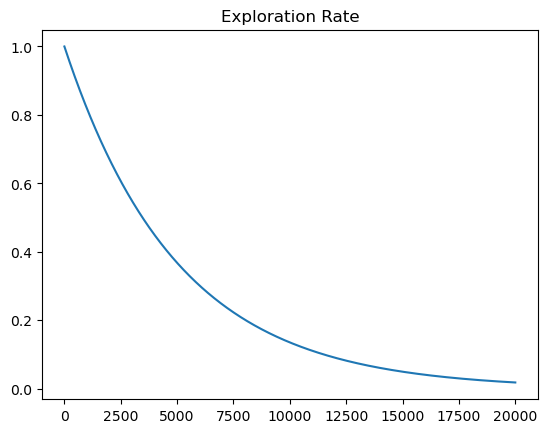

In [50]:
# Parameters

alpha = 0.1 # learning rate
gamma = 0.99 # discount rate

def epsilon(episode):
    """
    Returns the exploration rate given the episode number
    """
    max, min, decay_rate = 1, 0, 0.0002
    return min + (max-min) * np.exp(-decay_rate*episode)

num_episodes = 20000
max_steps = 100 # maximum number of steps per episode

plt.plot([epsilon(i) for i in range(num_episodes)]);
plt.title('Exploration Rate');

In [51]:
# Setting-up Environment and Q-Table

env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True) # what happens if we change is_slippery to true?

num_states = env.observation_space.n
num_actions = env.action_space.n

In [52]:
all_rewards = []

Q1, Q2 = np.zeros((num_states, num_actions)), np.zeros((num_states, num_actions))

for episode in range(num_episodes):
    
    episode_reward = 0 # total reward for the current episode
    state = env.reset()
    
    for step in range(max_steps):
        
        if np.random.uniform(0, 1) < epsilon(episode):
            action = env.action_space.sample() # random action
        else:
            action = np.argmax(Q1[state,:] + Q2[state,:]) # greedy action
        
        next_state, reward, done, info = env.step(action)
        
        if np.random.uniform(0, 1) < 0.5:
            # update Q1
            next_action = np.argmax(Q1[next_state, :])
            Q1[state, action] = Q1[state, action] + alpha*(reward + gamma*np.max(Q2[next_state, next_action]) - Q1[state, action])
        else:
            # update Q2
            next_action = np.argmax(Q2[next_state, :])
            Q2[state, action] = Q2[state, action] + alpha*(reward + gamma*np.max(Q1[next_state, next_action]) - Q2[state, action])
        
        state = next_state
        episode_reward += reward
        
        if done:
            break
        
    all_rewards.append(episode_reward)

In [53]:
Q = (Q1 + Q2)/2

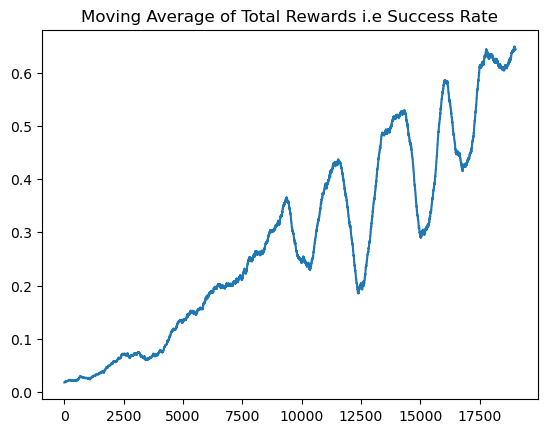

In [54]:
def moving_average(array, n=100):
    """
    Returns the moving average of an array over a window of size n.
    """
    return np.convolve(array, np.ones(n), 'valid')/n

plt.plot(moving_average(all_rewards, 1000));
plt.title('Moving Average of Total Rewards i.e Success Rate');

In [55]:
def play_game(env, Q, max_steps=100):
    """
    Renders policy once on environment. Watch your agent play!

    Parameters
    ----------
    env: gym.core.Environment
        Environment to play on. Must have nS, nA, and P as
        attributes.
    Q: Q-table i.e Q[s,a]
    """
    
    episode_reward = 0
    state = env.reset()
    for t in range(max_steps):
        env.render()
        sleep(0.11)
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            break
        clear_output(wait=True)
    env.render()
    if done:
        print(f'Episode reward: {episode_reward}')
    else:
        print(f'Agent did not reach a terminal state in {max_steps} steps')

In [56]:
play_game(env, Q)

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode reward: 1.0
